<a href="https://colab.research.google.com/github/deeplylearned/cs6140/blob/main/MomentumNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Regression Example With Boston Dataset: Standardized and Larger
import pandas as pd
import time
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
# load dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataframe = pd.read_csv("/content/drive/MyDrive/housingData.csv")
dataframe = pd.read_csv("/content/drive/MyDrive/boston.csv")
dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]
# define the model
def larger_model():
  # create model
  model = Sequential()
  model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(Dense(6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD')
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -22.93 (22.35) MSE


In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

# # load pima indians dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, nesterov=False, name='SGD')
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[ keras.metrics.MeanSquaredError()])
# Fit the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
start = time.time()
history = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10, verbose=0,callbacks=[es])
end = time.time()
print("Traning time:", end - start)
# list all data in history


Epoch 00017: early stopping
Traning time: 1.742114782333374


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


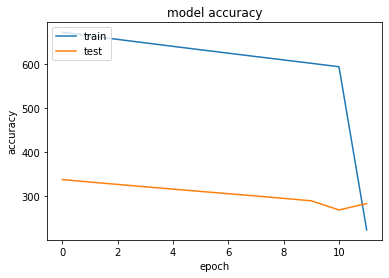

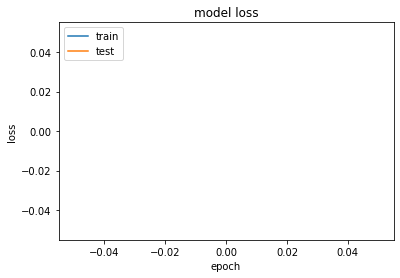

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'][5:])
plt.plot(history.history['val_mean_squared_error'][5:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for i in range(15,len(history.history['mean_squared_error'])-15):
  mean = 0 
  index = -1
  for j in range(15):
    mean+= history.history['mean_squared_error'][i-j]
  # print(mean/15)
  if mean/15 < 75:
    print(i)
    print("Loss:", mean/15)
    break
  # if index > 0 :
  #   print(index)
  # break

67
Loss: 74.57771402994791


#Momentum

In [ ]:
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

# # load pima indians dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8, nesterov=False, name='SGD')
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[ keras.metrics.MeanSquaredError()])
# Fit the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
start = time.time()
history = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10, verbose=0,callbacks=[es])
end = time.time()
print("Traning time:", end - start)

Epoch 00035: early stopping
Traning time: 3.083616256713867


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


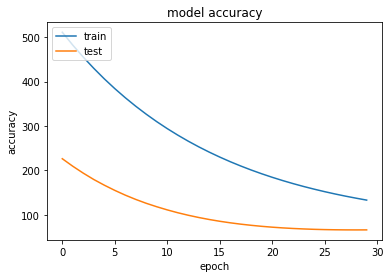

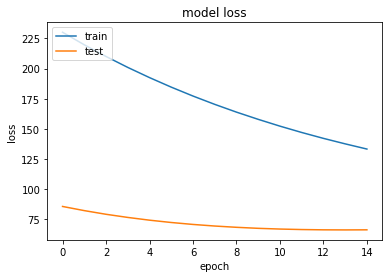

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'][5:])
plt.plot(history.history['val_mean_squared_error'][5:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for i in range(15,len(history.history['mean_squared_error'])-15):
  mean = 0 
  index = -1
  for j in range(15):
    mean+= history.history['mean_squared_error'][i-j]
  # print(mean/15)
  if mean/15 < 75:
    print(i)
    print("Loss:", mean/15)
    break
  # if index > 0 :
  #   print(index)
  # break

24
Loss: 73.44388478597006


In [ ]:
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

# # load pima indians dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8, nesterov=True, name='SGD')
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[ keras.metrics.MeanSquaredError()])
# Fit the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
start = time.time()
history = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10, verbose=0,callbacks=[es])
end = time.time()
print("Traning time:", end - start)

Epoch 00035: early stopping
Traning time: 3.255129337310791


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


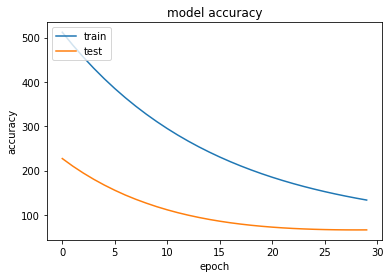

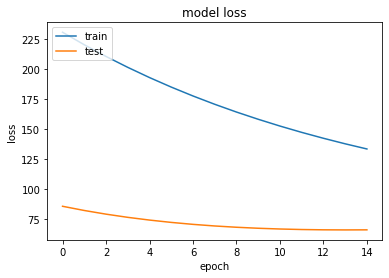

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'][5:])
plt.plot(history.history['val_mean_squared_error'][5:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for i in range(15,len(history.history['mean_squared_error'])-15):
  mean = 0 
  index = -1
  for j in range(15):
    mean+= history.history['mean_squared_error'][i-j]
  # print(mean/15)
  if mean/15 < 75:
    print(i)
    print("Loss:", mean/15)
    break
  # if index > 0 :
  #   print(index)
  # break

91
Loss: 74.90603129069011


In [ ]:
def sgd_nn():
  dataset = dataframe.values
  # split into input (X) and output (Y) variables
  X = dataset[:,0:13]
  Y = dataset[:,13]

  # # load pima indians dataset
  # dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
  # # split into input (X) and output (Y) variables
  # X = dataset[:,0:8]
  # Y = dataset[:,8]
  # create model
  model = Sequential()
  model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(Dense(6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0, nesterov=True, name='SGD')
  model.compile(loss='mean_squared_error', optimizer=opt, metrics=[ keras.metrics.MeanSquaredError()])
  # Fit the model
  start = time.time()
  history = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10, verbose=0)
  end = time.time()

  for i in range(15,len(history.history['mean_squared_error'])-15):
    mean = 0 
    index = -1
    for j in range(15):
      mean+= history.history['mean_squared_error'][i-j]
    # print(mean/15)
    if mean/15 < 75:
      # print(i)
      # print("Loss:", mean/15)
      return( i , mean/15, end - start)

In [ ]:
def momentum_nn():
  dataset = dataframe.values
  # split into input (X) and output (Y) variables
  X = dataset[:,0:13]
  Y = dataset[:,13]

  # # load pima indians dataset
  # dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
  # # split into input (X) and output (Y) variables
  # X = dataset[:,0:8]
  # Y = dataset[:,8]
  # create model
  model = Sequential()
  model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(Dense(6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8, nesterov=False, name='SGD')
  model.compile(loss='mean_squared_error', optimizer=opt, metrics=[ keras.metrics.MeanSquaredError()])
  # Fit the model
  start = time.time()
  history = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10, verbose=0)
  end = time.time()

  for i in range(15,len(history.history['mean_squared_error'])-15):
    mean = 0 
    index = -1
    for j in range(15):
      mean+= history.history['mean_squared_error'][i-j]
    # print(mean/15)
    if mean/15 < 75:
      # print(i)
      # print("Loss:", mean/15)
      return( i , mean/15, end - start)

In [ ]:
def nesterov_nn():
  dataset = dataframe.values
  # split into input (X) and output (Y) variables
  X = dataset[:,0:13]
  Y = dataset[:,13]

  # # load pima indians dataset
  # dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
  # # split into input (X) and output (Y) variables
  # X = dataset[:,0:8]
  # Y = dataset[:,8]
  # create model
  model = Sequential()
  model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(Dense(6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8, nesterov=True, name='SGD')
  model.compile(loss='mean_squared_error', optimizer=opt, metrics=[ keras.metrics.MeanSquaredError()])
  # Fit the model
  start = time.time()
  history = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10, verbose=0)
  end = time.time()

  for i in range(15,len(history.history['mean_squared_error'])-15):
    mean = 0 
    index = -1
    for j in range(15):
      mean+= history.history['mean_squared_error'][i-j]
    # print(mean/15)
    if mean/15 < 75:
      # print(i)
      # print("Loss:", mean/15)
      return( i , mean/15 , end - start)

In [ ]:
nest_conv = 0
nest_error = 0
nest_time = 0
sgd_conv = 0
sgd_error = 0
sgd_time = 0
moment_conv = 0
moment_error = 0
moment_time = 0

for x in range(5):
  conv1 , error1 ,time1 = nesterov_nn()
  conv2 , error2, time2 = sgd_nn()
  conv3 , error3, time3 = momentum_nn()

  nest_conv += conv1
  nest_error += error1
  nest_time += time1

  sgd_conv += conv2
  sgd_error += error2
  sgd_time += time2 

  moment_conv += conv3
  moment_error += error3
  moment_time += time3

print("Nesterov Error:", nest_error/5)
print("Nesterov Convergence:", nest_conv/5)
print("Nesterov Time:", nest_time/5)
print("sgd_ Error:", sgd_error/5)
print("sgd_ Convergence:", sgd_conv/5)
print("sgd_ time:", sgd_time/5)
print("moment_ Error:", moment_error/5)
print("moment_ Convergence:", moment_conv/5)
print("moment_ time:", moment_time/5)

Nesterov Error: 74.61767110188802
Nesterov Convergence: 77.2
Nesterov Time: 44.381943702697754
sgd_ Error: 74.87670766194663
sgd_ Convergence: 293.4
sgd_ time: 43.911032581329344
moment_ Error: 74.3857475789388
moment_ Convergence: 65.0
moment_ time: 44.39724621772766
